# Understanding rates of change (변화에 대하여)

변화는 '__시간의 차이__'에서 비롯되며, <br/>
순간은 그저 '__한 순간__'일 뿐이다.

즉, "순간의 변화" 라는 표현은 모순된 표현이 연결된 역설적인 문장이다. <br/>
* 순간(instantaneous): 어느 특정 한 점 ( at, ● ) 
* 변화(change): 두 시점 사이에서 발생하는 차이 ( between, | | )

<br/>

※ '모순'과 '역설'은 다르다 
- 모순: 말 자체가 안 되는 것 (e.g., 무엇이는 막는 방패와 무엇이든 뚫는 창)
- 역설: 모순 처럼 보이지만 그 안에 숨은 진리가 있는 것 (e.g., 작은 거인)

<br/>

결국, 미분에서 말하는 순간(instantaneous) := 아주 짧은 시간 간극 

<br/>

instantaneous : 순간의 (=동시에 일어나는) 
* instant에서 온 건가?


two of the most important concepts from calculus:
* the derivative and the integral
* the derivative takes a function and gives you another function measuring its rate of change
* the integral does the opposite; it takes a function representing __a rate of change__ and gives you back a function measuring the original, __cumulative value__

<br/>



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_function(f, tmin, tmax, tlabel=None, xlabel=None, axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)  # value sequence 생성 ; (ref) https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

    if tlabel:
        plt.xlabel(tlabel,fontsize=18)   # x-축 레이블 설정 ; (ref) https://codetorial.net/matplotlib/set_label.html
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)

    plt.plot(ts, [f(t) for t in ts], **kwargs) # 기본 그래프 및 스타일 옵션 추가 ; (ref) https://wikidocs.net/92071

    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [11]:
"""  to plot volume or flow rate vs. time with correct labels.
"""
def plot_volume(func,tmin,tmax,axes=False,**kwargs):
    plot_function(func, tmin, tmax, tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(func,tmin,tmax,axes=False,**kwargs):
    plot_function(func,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

## 1. Calculating average flow rates from volumes

In [8]:
""" These are the actual volume and flow rate functions, 
    used throughout the chapter. You can ignore the formulas that define them.
    (refer to page 338)
"""
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

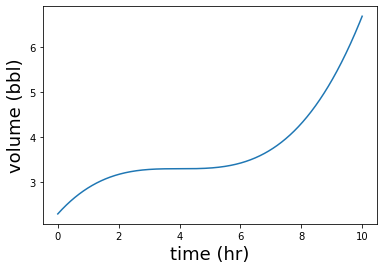

In [9]:
plot_volume(volume, 0, 10) # A plot of the volume function shows the volume of oil in the tank over time.

### 1.1 Implementing an ```average_flow_rate``` function - (평균 변화율)
The way to calculate the 'average flow rate' is to take the total change in volume divided by the elapsed time:

\begin{equation}


\textrm{average flow rate} = \frac{\textrm{change in volum}}{\textrm{elapsed time}} 
                            
\end{equation}


 

This is how we calculate rates of change in different contexts:

\begin{equation}


\textrm{average flow rate from }t_1 \textrm{ to } t_2 = \frac{V(t_2)-V(t1)}{t_2 - t_1}
                            
\end{equation}

In [6]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)    # 경과 시간에 대한 볼륨의 변화 
                                        # t1 := starting time 
                                        # t2 := ending time 

In [10]:
volume(4)  # 탱크의 볼륨 @ 4-hr 

3.3

In [11]:
volume(9)  # 탱크의 볼륨 @ 9-hr 

5.253125

In [12]:
average_flow_rate(volume, 4, 9)     # 4-hr -> 9-hr 로 시간의 변화에 따른 볼륨의 평균 변화율 
                                    # the average flow rate into the tank between 
                                    # the 4-hr mark and the 9-hr mark

0.390625

In [12]:
(5.253125 - 3.3) / ( 9 - 4)   # 계산 확인 

0.390625

### 1.2 Picturing the average flow rate with a secant line
check the page 340.

### 1.3 Negative rates of change

In [17]:

def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

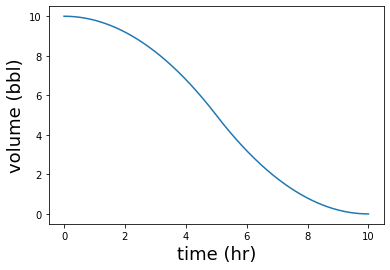

In [19]:
plot_volume(decreasing_volume, 0, 10)   # plot_volume(decreasing_volume,0,10)

In [21]:
average_flow_rate(decreasing_volume,0,4)   # 0-hr -> 4-hr 로 시간의 변화에 따른 볼륨의 평균 변화율 
                                           # the average flow rate into the tank between 
                                           # the 0-hr mark and the 4-hr mark

-0.8

### 1.4 Exercises

**Exercise:** Suppose you start a road-trip at noon, when your odometer reads 77,641 miles and you end your road-trip at 4:30 in the afternoon with your odometer reading 77,905 miles.  What was your average speed during the trip?

(77905 - 77641) / 4.5